## Introduction
You are encouraged to select a dataset that resonates with your academic focus, personal interests, or hobbies. This personal connection to the data can enhance your analytical approach and the insights you derive.

## Dataset Selection
I've selected "Motor Vehicle Registrations Dashboard data" from the U.S. Department of Transportation. This dataset contains the year, state, and number of automobiles, busses, trucks, and motorcycles were registered for the year in that state. This interests me because of the historical context. It will be fascinating to see how different modes of transportation have appeared, gained and declined in popularity. The way we transport ourselves and our goods impacts the way we interact with out environment and how we see it. Transportation also, of course, has effects on our environment (pollution, aesthetics) and our economy (transportation of goods, automobile market). 


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

mv_reg_df = pd.read_csv('Motor_Vehicle_Registrations_Dashboard_data.csv')
mv_reg_df.head(100)

,year,state,Auto,Bus,Truck,Motorcycle
0,1900,Alabama,40.0,0.0,0.0,0.0
1,1900,Alaska,0.0,0.0,0.0,0.0
2,1900,Arizona,20.0,0.0,0.0,0.0
3,1900,Arkansas,20.0,0.0,0.0,0.0
4,1900,California,780.0,0.0,0.0,0.0
...,...,...,...,...,...,...
95,1901,Utah,40.0,0.0,0.0,0.0
96,1901,Vermont,70.0,0.0,0.0,0.0
97,1901,Virginia,90.0,0.0,0.0,0.0
98,1901,Washington,230.0,0.0,0.0,0.0


Before visualizing I would like to modify this data a bit to make the visualizations more effective. I would like to aggregate in four ways: by state, by division, by region and altogether as a country. I will use the U.S. Census designated regions and divisions.

### U.S. Census designated regions:

#### Region 1: Northeast

Division 1: New England (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont)

Division 2: Middle Atlantic (New Jersey, New York, and Pennsylvania)

#### Region 2: Midwest (designated as the North Central Region before June 1984)[8]

Division 3: East North Central (Illinois, Indiana, Michigan, Ohio, and Wisconsin)

Division 4: West North Central (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)

#### Region 3: South

Division 5: South Atlantic (Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, 

Washington, D.C., and West Virginia)

Division 6: East South Central (Alabama, Kentucky, Mississippi, and Tennessee)

Division 7: West South Central (Arkansas, Louisiana, Oklahoma, and Texas)

#### Region 4: West

Division 8: Mountain (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)

Division 9: Pacific (Alaska, California, Hawaii, Oregon, and Washington)

In [2]:
# Creating dictionary to map states to regions

state_to_region = {
    'Connecticut': 'Northeast', 
    'Maine': 'Northeast', 
    'Massachusetts': 'Northeast', 
    'New Hampshire': 'Northeast', 
    'Rhode Island': 'Northeast', 
    'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 
    'New York': 'Northeast', 
    'Pennsylvania': 'Northeast',
    'Illinois': 'Midwest', 
    'Indiana': 'Midwest', 
    'Michigan': 'Midwest', 
    'Ohio': 'Midwest', 
    'Wisconsin': 'Midwest',
    'Iowa': 'Midwest', 
    'Kansas': 'Midwest', 
    'Minnesota': 'Midwest', 
    'Missouri': 'Midwest', 
    'Nebraska': 'Midwest', 
    'North Dakota': 'Midwest', 
    'South Dakota': 'Midwest',
    'Delaware': 'South', 
    'Florida': 'South', 
    'Georgia': 'South', 
    'Maryland': 'South', 
    'North Carolina': 'South', 
    'South Carolina': 'South', 
    'Virginia': 'South', 
    'Washington, D.C.': 'South', 
    'West Virginia': 'South',
    'Alabama': 'South', 
    'Kentucky': 'South', 
    'Mississippi': 'South', 
    'Tennessee': 'South',
    'Arkansas': 'South', 
    'Louisiana': 'South', 
    'Oklahoma': 'South', 
    'Texas': 'South',
    'Arizona': 'West', 
    'Colorado': 'West', 
    'Idaho': 'West', 
    'Montana': 'West', 
    'Nevada': 'West', 
    'New Mexico': 'West', 
    'Utah': 'West', 
    'Wyoming': 'West',
    'Alaska': 'West', 
    'California': 'West', 
    'Hawaii': 'West', 
    'Oregon': 'West', 
    'Washington': 'West'
}

# Map states to regions
mv_reg_df['region'] = mv_reg_df['state'].map(state_to_region)
mv_reg_df.head()

,year,state,Auto,Bus,Truck,Motorcycle,region
0,1900,Alabama,40.0,0.0,0.0,0.0,South
1,1900,Alaska,0.0,0.0,0.0,0.0,West
2,1900,Arizona,20.0,0.0,0.0,0.0,West
3,1900,Arkansas,20.0,0.0,0.0,0.0,South
4,1900,California,780.0,0.0,0.0,0.0,West


In [3]:
# Create dictionary to map states to divisions

state_to_division = {
    'Connecticut': 'New England',
    'Maine': 'New England',
    'Massachusetts': 'New England',
    'New Hampshire': 'New England',
    'Rhode Island': 'New England',
    'Vermont': 'New England',
    'New Jersey': 'Middle Atlantic',
    'New York': 'Middle Atlantic',
    'Pennsylvania': 'Middle Atlantic',
    'Illinois': 'East North Central',
    'Indiana': 'East North Central',
    'Michigan': 'East North Central',
    'Ohio': 'East North Central',
    'Wisconsin': 'East North Central',
    'Iowa': 'West North Central',
    'Kansas': 'West North Central',
    'Minnesota': 'West North Central',
    'Missouri': 'West North Central',
    'Nebraska': 'West North Central',
    'North Dakota': 'West North Central',
    'South Dakota': 'West North Central',
    'Delaware': 'South Atlantic',
    'Florida': 'South Atlantic',
    'Georgia': 'South Atlantic',
    'Maryland': 'South Atlantic',
    'North Carolina': 'South Atlantic',
    'South Carolina': 'South Atlantic',
    'Virginia': 'South Atlantic',
    'Washington, D.C.': 'South Atlantic',
    'West Virginia': 'South Atlantic',
    'Alabama': 'East South Central',
    'Kentucky': 'East South Central',
    'Mississippi': 'East South Central',
    'Tennessee': 'East South Central',
    'Arkansas': 'West South Central',
    'Louisiana': 'West South Central',
    'Oklahoma': 'West South Central',
    'Texas': 'West South Central',
    'Arizona': 'Mountain',
    'Colorado': 'Mountain',
    'Idaho': 'Mountain',
    'Montana': 'Mountain',
    'Nevada': 'Mountain',
    'New Mexico': 'Mountain',
    'Utah': 'Mountain',
    'Wyoming': 'Mountain',
    'Alaska': 'Pacific',
    'California': 'Pacific',
    'Hawaii': 'Pacific',
    'Oregon': 'Pacific',
    'Washington': 'Pacific'
}

# Map states to divisions
mv_reg_df['division'] = mv_reg_df['state'].map(state_to_division)
mv_reg_df.head()

,year,state,Auto,Bus,Truck,Motorcycle,region,division
0,1900,Alabama,40.0,0.0,0.0,0.0,South,East South Central
1,1900,Alaska,0.0,0.0,0.0,0.0,West,Pacific
2,1900,Arizona,20.0,0.0,0.0,0.0,West,Mountain
3,1900,Arkansas,20.0,0.0,0.0,0.0,South,West South Central
4,1900,California,780.0,0.0,0.0,0.0,West,Pacific


In [4]:
country_mv_df = mv_reg_df.groupby(['year']).sum()
country_mv_df.head()

,Auto,Bus,Truck,Motorcycle
year,,,,
1900,8000.0,0.0,0.0,0.0
1901,14800.0,0.0,0.0,0.0
1902,23000.0,0.0,0.0,0.0
1903,32920.0,0.0,0.0,0.0
1904,54590.0,0.0,700.0,0.0


In [5]:
# Create dataframes for each region and aggregating by year for visualization

ne_df = mv_reg_df.query("region == 'Northeast'")
ne_df = ne_df.groupby(['year']).sum()

south_df = mv_reg_df.query("region == 'South'")
south_df = south_df.groupby(['year']).sum()

mw_df = mv_reg_df.query("region == 'Midwest'")
mw_df = mw_df.groupby(['year']).sum()

west_df = mv_reg_df.query("region == 'West'")
west_df = west_df.groupby(['year']).sum()

# Create dataframes for each division and aggregating by year for visualization

newe_df = mv_reg_df.query("division == 'New England'")
newe_df = newe_df.groupby(['year']).sum()

mida_df = mv_reg_df.query("division == 'Middle Atlantic'")
mida_df = mida_df.groupby(['year']).sum()

enc_df = mv_reg_df.query("division == 'East North Central'")
enc_df = enc_df.groupby(['year']).sum()

wnc_df = mv_reg_df.query("division == 'West North Central'")
wnc_df = wnc_df.groupby(['year']).sum()

sat_df = mv_reg_df.query("division == 'South Atlantic'")
sat_df = sat_df.groupby(['year']).sum()

esc_df = mv_reg_df.query("division == 'East South Central'")
esc_df = esc_df.groupby(['year']).sum()

wsc_df = mv_reg_df.query("division == 'West South Central'")
wsc_df = wsc_df.groupby(['year']).sum()

mtn_df = mv_reg_df.query("division == 'Mountain'")
mtn_df = mtn_df.groupby(['year']).sum()

pc_df = mv_reg_df.query("division == 'Pacific'")
pc_df = pc_df.groupby(['year']).sum()


# Create dataframe for Washington state and aggregate by year for visualization


washington_df = mv_reg_df.query("state == 'Washington'")
washington_df = washington_df.groupby(['year']).sum()

## Assignment Parts
### Part 1: Line Charts
**Objective**: Visualize a trend within your dataset

**Task**: Create a line chart and explain the trend you've observed. Discuss any patterns, anomalies, or insights derived from this visualization.

[Text(0.5, 1.0, 'United States Motor Vehicle Registrations')]

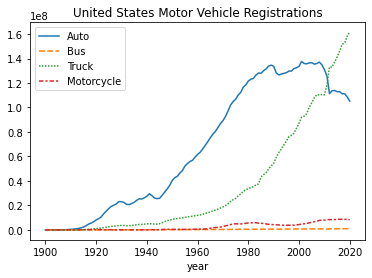

In [6]:
sns.lineplot(data=country_mv_df).set(title='United States Motor Vehicle Registrations')

Here we see a downward trend in Auto registrations beginning in the 80s and again around 2010. This goes along with a consistent upward trend in Truck registrations. It is possible that the upward trend in Truck registrations is an explanatory variable for why Auto registrations are declining. Bus and Motorcycle registrations are not as significant in comparison.

[Text(0.5, 1.0, 'Northeast Region Motor Vehicle Registrations')]

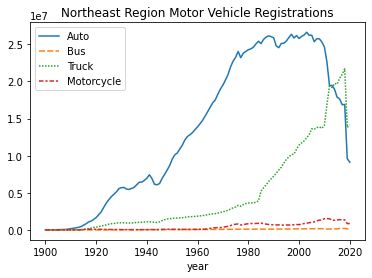

In [7]:
sns.lineplot(data=ne_df).set(title='Northeast Region Motor Vehicle Registrations')

[Text(0.5, 1.0, 'South Region Motor Vehicle Registrations')]

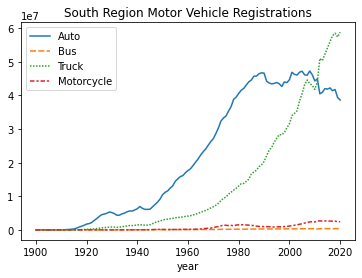

In [8]:
sns.lineplot(data=south_df).set(title='South Region Motor Vehicle Registrations')

[Text(0.5, 1.0, 'Midwest Region Motor Vehicle Registrations')]

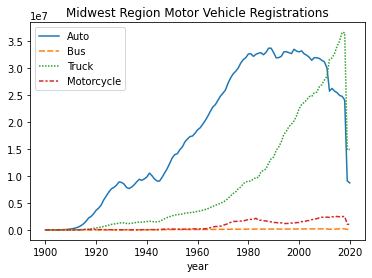

In [9]:
sns.lineplot(data=mw_df).set(title='Midwest Region Motor Vehicle Registrations')

[Text(0.5, 1.0, 'West Region Motor Vehicle Registrations')]

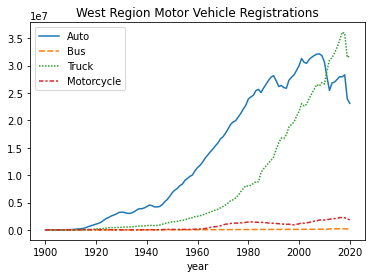

In [10]:
sns.lineplot(data=west_df).set(title='West Region Motor Vehicle Registrations')

All of the regions display similar trends although the South appears to be the only region without both Auto and Truck registrations steeply declining around 2020. This may be explained by the COVID-19 pandemic that began in 2020 but the data available also ends in 2020; so it is possible that some regions did not report all registrations for 2020 by the time this data was collected.

In all of these graphs it is difficult to parse trends in motorcycle and bus registrations so it may be beneficial to examine each type by region.

[Text(0.5, 1.0, 'Bus Registrations by Region')]

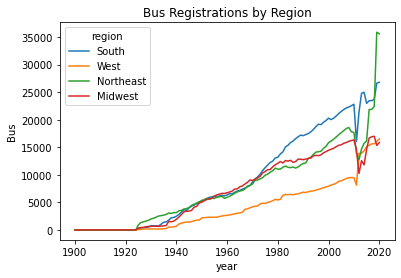

In [11]:
sns.lineplot(data=mv_reg_df, x='year', y='Bus', hue='region', ci=None).set(title='Bus Registrations by Region')

Here we can see some differences by region when it comes to bus registrations. The Northeast region surpassed the South region around 2010. The West appears to have the least amount of registrations for the majority of years. It is possible that some kind of pro-public transportation legislation occurred in some Northeast states and that caused the spike in registrations. Another possibility could consider private busses, maybe a company expanded to the region or started business there. It would be interesting to see the impacts of the COVID-19 pandemic on these registrations but unfortunately we do not have that data available here.

[Text(0.5, 1.0, 'Bus Registrations by Division')]

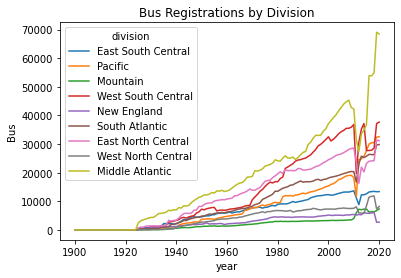

In [12]:
sns.lineplot(data=mv_reg_df, x='year', y='Bus', hue='division', ci=None).set(title='Bus Registrations by Division')

This reveals more about how the Northeast region surpassed other regions with bus registrations. Here we can see the Middle Atlantic leads this trend. Recall that this division is comprised of New Jersey, New York and Pennsylvania, all of which have dense populations and public transportation to support those populations. We could zoom in further to just this division to see which of these states make up most of these registrations.

[Text(0.5, 1.0, 'Bus Registrations by Mid Atlantic State')]

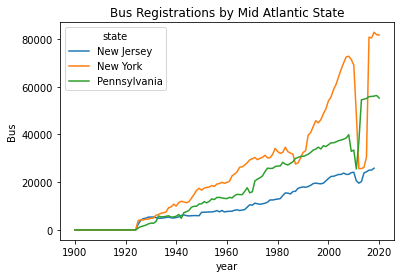

In [13]:
mida_states = mv_reg_df.query("state == 'New Jersey' | state == 'New York'| state == 'Pennsylvania'")
sns.lineplot(data=mida_states, x='year', y='Bus', hue='state', ci=None).set(title='Bus Registrations by Mid Atlantic State')

Now it is clear that New York is a major driver of this upward trend in bus registrations in the Northeast region.

[Text(0.5, 1.0, 'Auto Registrations by Region')]

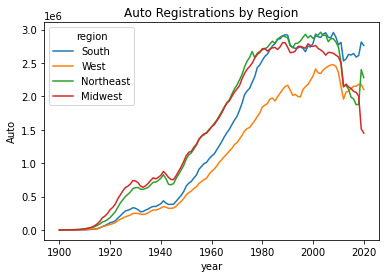

In [14]:
sns.lineplot(data=mv_reg_df, x='year', y='Auto', hue='region', ci=None).set(title='Auto Registrations by Region')

Auto registrations appear to have reached a peak and then plateau for most regions in the 1980's and began declining in 2010. The West's registrations have a similar shape but do not peak until after 2000. Could this be attributed to shifts in population toward the West? In all of these visualizations it's also important to note that this is a count of registrations, so maybe there is also a difference in how registrations are handled in different regions. Maybe there is also a difference in registration enforcement--perhaps in some regions there is less enforcement so there are less registrations.

[Text(0.5, 1.0, 'Auto Registrations by Division')]

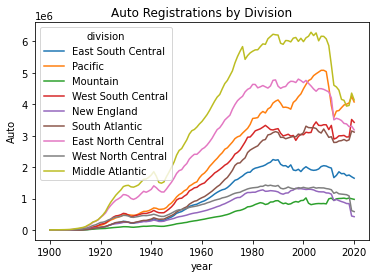

In [15]:
sns.lineplot(data=mv_reg_df, x='year', y='Auto', hue='division', ci=None).set(title='Auto Registrations by Division')

Broken down by division the trends appear more similar and also appear to possibly be influenced by population. It would be interesting to see if there is any correlation between registrations and population.

[Text(0.5, 1.0, 'Truck Registrations by Region')]

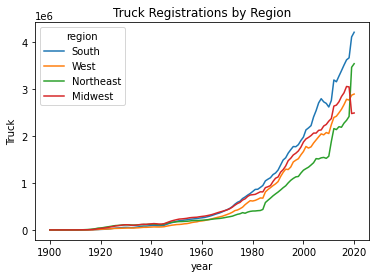

In [16]:
sns.lineplot(data=mv_reg_df, x='year', y='Truck', hue='region', ci=None).set(title='Truck Registrations by Region')

Here we can see how registrations for Trucks exhibit an almost exponential growth. To better understand this it would be of interest to examine the definition of "Trucks." Does this include 18-wheelers, SUVs? The trends by region also appear to support stereotypes of regions and their relationships with trucks, with the South leading and the Northeast having the least amount of registrations. This also makes sense when considering the agricultural and rural attributes of these regions.

[Text(0.5, 1.0, 'Truck Registrations by Division')]

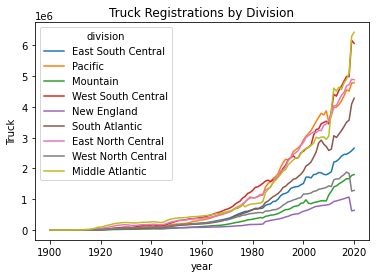

In [17]:
sns.lineplot(data=mv_reg_df, x='year', y='Truck', hue='division', ci=None).set(title='Truck Registrations by Division')

Now the picture looks a little different for trucks, the South region doesn't appear to be a leader at a glance. However, if you look back on how the regions are split into divisions you will notice that the South region is the only one to be split into three divisions, instead of two. This can account for how these trend lines from South divisions appear lower here.

### Part 2: Bar Charts
**Objective**: Compare different categories or groups within your dataset.

**Task**: Generate a bar chart to illustrate these comparisons. Analyze the results and explain any significant findings.

In [18]:
region_df = mv_reg_df.drop(['year'], axis=1)
region_df.groupby('region').sum()

,Auto,Bus,Truck,Motorcycle
region,,,,
Midwest,2.156486e+09,10135148.0,1.033012e+09,94800373.29
Northeast,1.637740e+09,8196104.0,5.663659e+08,50497631.18
South,2.654818e+09,17516040.0,1.607920e+09,86678787.60
West,1.670549e+09,6408173.0,1.001527e+09,79467459.12


In [19]:
recent_df = mv_reg_df[mv_reg_df['year'] >= 2010] # only looking at years 2010-2020
recent_df = recent_df.fillna(0.0) # filling NaN with 0.0 (the previous value before it became NaN)
recent_df.loc[recent_df['region'] == 0.0, 'region'] = 'South' # changing D.C. region to South

<AxesSubplot:xlabel='year', ylabel='Bus'>

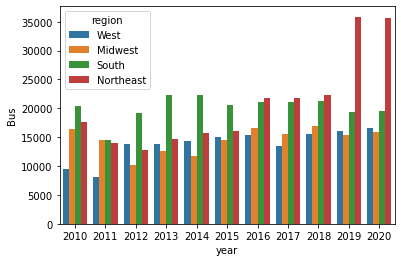

In [20]:
sns.barplot(data=recent_df, x="year", y="Bus", hue="region", ci=None)

<AxesSubplot:xlabel='region', ylabel='Bus'>

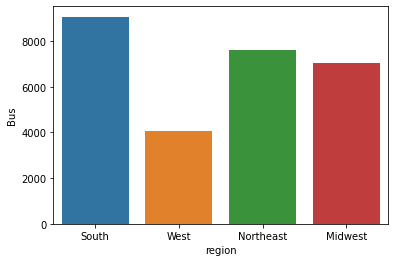

In [21]:
sns.barplot(data=mv_reg_df, x="region", y="Bus", ci=None)

Above you can observe that although the South has had the most bus registrations over the years recorded in this dataset, the Northeast has repeatedly surpassed the registrations in the South since 2016. Previous to 2016 the South region had the most bus registrations.

In [22]:
mida_recent_df = mida_states[mida_states['year'] >= 2010] # only looking at years 2010-2020
mida_recent_df = mida_recent_df.fillna(0.0)

<AxesSubplot:xlabel='year', ylabel='Bus'>

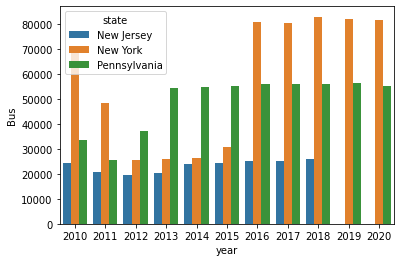

In [23]:
sns.barplot(data=mida_recent_df, x="year", y="Bus", hue="state", ci=None)

Similar to the line graphs we can see that New York surpasses the other states in the Middle Atlantic division. With this bar chart we can also see that the year this occurred was 2016, the same year the Northeast surpassed the South.

<AxesSubplot:>

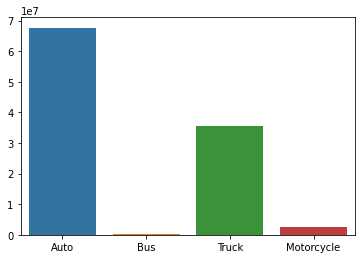

In [24]:
sns.barplot(data=country_mv_df, ci=None)

Above you can see that Auto registrations are higher than any other type of registration for the 120 years this dataset covers. Below you can see the registrations for just 2020.

<AxesSubplot:xlabel='index', ylabel='Registrations'>

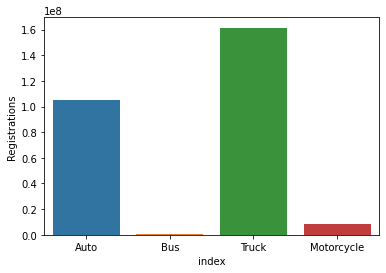

In [25]:
# Preparing a dataframe to visualize aggregations of each type of registration for 2020
df2020 = mv_reg_df[mv_reg_df['year'] == 2020]
df2020 = df2020.drop(['year', 'state'], axis = 1)
df2020 = df2020.sum()
df2020 = pd.DataFrame(df2020)
df2020.columns = ["Registrations"]
df2020 = df2020.reset_index()
df2020.head()

# Visualizing this dataframe
sns.barplot(data=df2020, x="index", y="Registrations", ci=None)

Now by observing the above bar chart you can observe that Truck registrations are cummulatively higher than Auto registrations in 2020.

<AxesSubplot:>

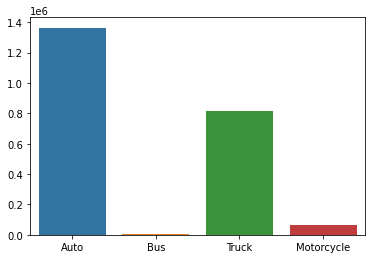

In [26]:
sns.barplot(data=washington_df, ci=None)

One last bar chart above shows that Washington state has similar proportions of registrations to the country from 1900-2020.

### Part 3: Heatmaps
**Objective**: Explore correlations or relationships between different variables in your dataset.

**Task**: Create a heatmap to visualize these relationships. Discuss any strong correlations and their potential implications.

<AxesSubplot:>

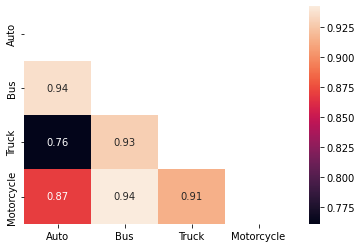

In [27]:
corr_matrix = country_mv_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot = True, mask = mask)

Above we can see that all of these variables are positively correlated, and most are strong. This is because the general trend over the years has been positive for all types of transportation registrations. Let's look at these correlations again, but over the past ten years.

In [28]:
recent_df_by_year = recent_df.groupby(['year']).sum()
recent_df_by_year.head()

,Auto,Bus,Truck,Motorcycle
year,,,,
2010,130892240.0,846051.0,110322254.0,8009503.00
2011,125656528.0,666064.0,118455587.0,8437502.00
2012,111289910.0,764509.0,133130029.0,8455028.68
2013,113676346.0,864550.0,132931240.0,8426450.00
2014,113898843.0,872028.0,137162349.0,8417717.49


<AxesSubplot:>

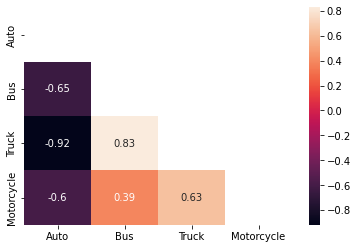

In [29]:
corr_matrix = recent_df_by_year.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot = True, mask = mask)

This is a more informative correlation heatmap. Here we can see that there is a negative correlation between Auto and all other modes of transportation. Bus and truck have the strongest positive correlation, Bus and Motorcycle have the weakest and the positive correlation between Truck and Motorcycle is moderately positive. Truck and Auto have the strongest negative correlation which suggests that Trucks and Auto registrations may be competing for the same consumers. The high positive correlation between Bus and Truck could be attributed to both becoming more popular modes of transportation in the ten years described by this dataframe.

### Part 4: Scatter Plots
**Objective**: Investigate the relationship between two quantitative variables in your dataset.

**Task**: Produce a scatter plot and analyze any trends or patterns. Hypothesize about the underlying causes of these observations.

<AxesSubplot:xlabel='year', ylabel='Auto'>

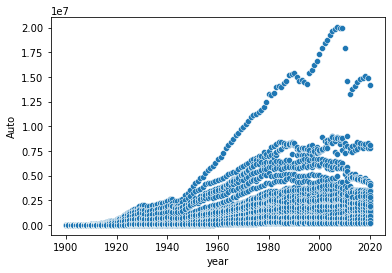

In [30]:
sns.scatterplot(data=mv_reg_df, x='year', y='Auto')

<AxesSubplot:xlabel='year', ylabel='Bus'>

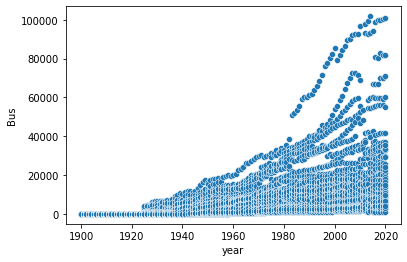

In [31]:
sns.scatterplot(data=mv_reg_df, x='year', y='Bus')

<AxesSubplot:xlabel='year', ylabel='Truck'>

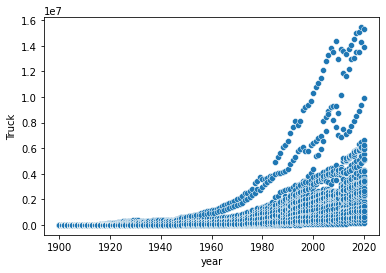

In [32]:
sns.scatterplot(data=mv_reg_df, x='year', y='Truck')

<AxesSubplot:xlabel='year', ylabel='Motorcycle'>

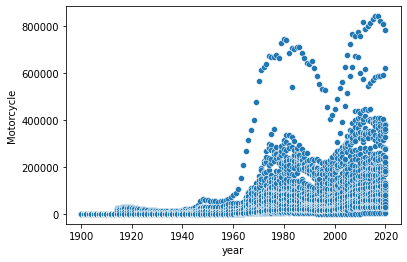

In [33]:
sns.scatterplot(data=mv_reg_df, x='year', y='Motorcycle')

Comparing these four types of registrations you can observe taht Truck and Bus have similar somewhat consistent positive trends while Auto's positive trend is beginning to slow. Motorcycle has an interesting dip that reaches its low around 2000 and now appears to be rising again. It's interesting that there is a peak around 1980, a few years after most (47 out of 50) states had enacted helmet laws for motorcycles.

Let's look at Truck registrations in the South region and all of the divisions in the South region.

[Text(0.5, 1.0, 'South Region Truck Registrations')]

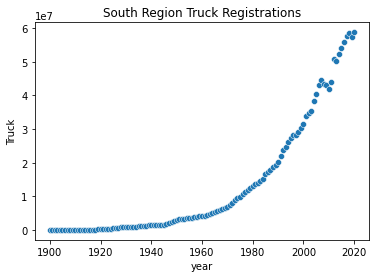

In [34]:
sns.scatterplot(data=south_df, x='year', y='Truck').set(title='South Region Truck Registrations')

[Text(0.5, 1.0, 'South Atlantic Truck Registrations')]

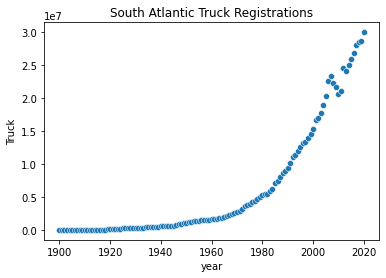

In [35]:
sns.scatterplot(data=sat_df, x='year', y='Truck').set(title='South Atlantic Truck Registrations')

[Text(0.5, 1.0, 'East South Central Truck Registrations')]

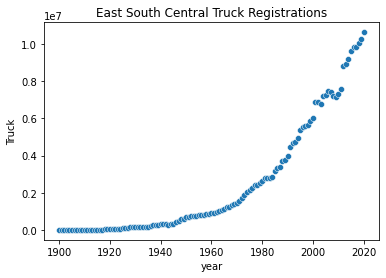

In [36]:
sns.scatterplot(data=esc_df, x='year', y='Truck').set(title='East South Central Truck Registrations')

[Text(0.5, 1.0, 'West South Central Truck Registrations')]

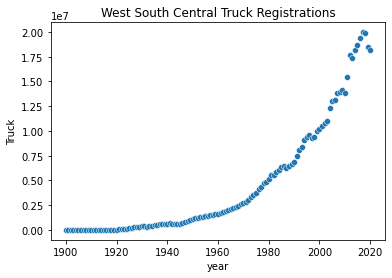

In [37]:
sns.scatterplot(data=wsc_df, x='year', y='Truck').set(title='West South Central Truck Registrations')

From these you can see the trend is similar between all three but East South Central has a lower number of registrations each year than the other two South region divisions. If you revisit which states are in this division, a possible theory can be that these states are less economically advantaged than the other two divisions in the region and so the resources to purchase and register trucks is less in this division.